In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [ ]:
# import os
# import sys
# sys.path.append(os.path.abspath('..'))

In [3]:
# these utils will load kaggle's digit data.
from ann_class2_util import get_normalized_data, y2indicator

In [4]:
def error_rate(p, t):
    return np.mean(p != t)

In [5]:
Xtrain, Xtest, Ytrain, Ytest  = get_normalized_data()

Reading in and transforming data...


In [6]:
def show_digit_with_label(X, Y, index):
    plt.title("Label: %d" % Y[index])
    plt.imshow(Xtrain[index,:].reshape(28,28))

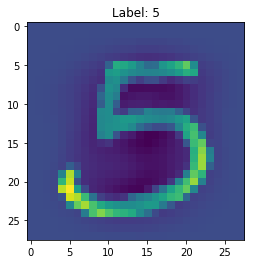

In [7]:
show_digit_with_label(Xtrain, Ytrain, 0)

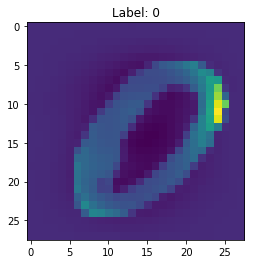

In [8]:
show_digit_with_label(Xtrain, Ytrain, 1)

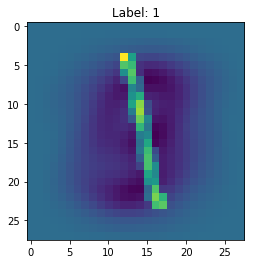

In [9]:
show_digit_with_label(Xtrain, Ytrain, 2)

In [10]:
Xtrain[0:5,]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
Xtest[0:5,]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
Ytrain[0:5]

array([5., 0., 1., 0., 1.], dtype=float32)

In [13]:
Ytest[0:5]

array([4., 5., 7., 8., 3.], dtype=float32)

In [19]:
def main():
    Xtrain, Xtest, Ytrain, Ytest  = get_normalized_data()
    
    max_iter = 30
    print_period = 10
    lr = 0.00004
    reg = 0.1
    
    print(Xtrain.shape)
    print(Ytrain.shape)
    print(Xtest.shape)
    print(Ytest.shape)
    
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)
    
    print(Ytrain_ind.shape)
    print(Ytest_ind.shape)
    
    N, D = Xtrain.shape
    batch_sz = 500
    n_batches = N//batch_sz
    
    M1 = 300
    M2 = 100
    K = 10
    W1_init = np.random.randn(D, M1) / 28
    b1_init = np.zeros(M1)
    W2_init = np.random.randn(M1, M2) / np.sqrt(M1)
    b2_init = np.zeros(M2)
    W3_init = np.random.randn(M2, K) / np.sqrt(M2)
    b3_init = np.zeros(K)
    
    X = tf.placeholder(tf.float32, shape=(None, D), name='X')
    T = tf.placeholder(tf.float32, shape=(None, K), name='T')
    W1 = tf.Variable(W1_init.astype(np.float32))
    b1 = tf.Variable(b1_init.astype(np.float32))
    W2 = tf.Variable(W2_init.astype(np.float32))
    b2 = tf.Variable(b2_init.astype(np.float32))
    W3 = tf.Variable(W3_init.astype(np.float32))
    b3 = tf.Variable(b3_init.astype(np.float32))
    
    Z1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    Z2 = tf.nn.relu(tf.matmul(Z1, W2) + b2)
    Yish = tf.matmul(Z2, W3) + b3
    
    cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=Yish, labels=T))

    train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)
    
    predict_op = tf.argmax(Yish, 1)
    
    LL = []
    init = tf.global_variables_initializer()
    
    saver = tf.train.Saver()
    
    with tf.Session() as session:
        session.run(init)
        
        for i in range(max_iter):
            for j in range(n_batches):
                Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
                Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz)]
                session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
                
                if j % print_period == 0:
                    test_cost = session.run(cost, feed_dict={X: Xtest, T: Ytest_ind})
                    prediction = session.run(predict_op, feed_dict={X: Xtest})
                    err = error_rate(prediction, Ytest)
                    print("Cost / err at iteration i=%d, j=%d: %.3f / %.3f" % (i, j, test_cost, err))
                    LL.append(test_cost)
        print("final accuracy: %.4f" % (1-err) )
        save_path = saver.save(session, "models/model.ckpt")
        print("Model saved in path: %s" % save_path)
                    
        plt.plot(LL)
        plt.show()
    

Reading in and transforming data...
(41000, 784)
(41000,)
(1000, 784)
(1000,)
(41000, 10)
(1000, 10)
Cost / err at iteration i=0, j=0: 2359.630 / 0.895
Cost / err at iteration i=0, j=10: 1457.049 / 0.352
Cost / err at iteration i=0, j=20: 809.358 / 0.210
Cost / err at iteration i=0, j=30: 543.172 / 0.157
Cost / err at iteration i=0, j=40: 430.786 / 0.126
Cost / err at iteration i=0, j=50: 380.269 / 0.117
Cost / err at iteration i=0, j=60: 332.785 / 0.102
Cost / err at iteration i=0, j=70: 309.004 / 0.095
Cost / err at iteration i=0, j=80: 293.820 / 0.098
Cost / err at iteration i=1, j=0: 287.371 / 0.094
Cost / err at iteration i=1, j=10: 263.328 / 0.085
Cost / err at iteration i=1, j=20: 252.615 / 0.084
Cost / err at iteration i=1, j=30: 243.143 / 0.076
Cost / err at iteration i=1, j=40: 231.881 / 0.074
Cost / err at iteration i=1, j=50: 220.924 / 0.067
Cost / err at iteration i=1, j=60: 212.921 / 0.062
Cost / err at iteration i=1, j=70: 209.494 / 0.064
Cost / err at iteration i=1, j=8

Cost / err at iteration i=17, j=50: 119.568 / 0.031
Cost / err at iteration i=17, j=60: 126.781 / 0.033
Cost / err at iteration i=17, j=70: 124.387 / 0.034
Cost / err at iteration i=17, j=80: 125.282 / 0.035
Cost / err at iteration i=18, j=0: 125.645 / 0.034
Cost / err at iteration i=18, j=10: 126.416 / 0.037
Cost / err at iteration i=18, j=20: 127.751 / 0.034
Cost / err at iteration i=18, j=30: 131.004 / 0.037
Cost / err at iteration i=18, j=40: 139.074 / 0.037
Cost / err at iteration i=18, j=50: 124.072 / 0.031
Cost / err at iteration i=18, j=60: 129.826 / 0.032
Cost / err at iteration i=18, j=70: 125.956 / 0.033
Cost / err at iteration i=18, j=80: 126.552 / 0.035
Cost / err at iteration i=19, j=0: 127.036 / 0.035
Cost / err at iteration i=19, j=10: 129.017 / 0.036
Cost / err at iteration i=19, j=20: 131.515 / 0.035
Cost / err at iteration i=19, j=30: 132.824 / 0.038
Cost / err at iteration i=19, j=40: 141.179 / 0.037
Cost / err at iteration i=19, j=50: 129.802 / 0.032
Cost / err at 

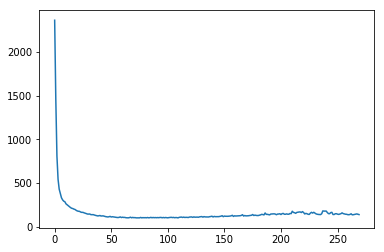

In [20]:
main()